## MNIST Code

Esse código é um exemplo de como treinar uma rede neural para classificar dígitos escritos a mão. O dataset utilizado é o MNIST. Além disso, foram utilizadas imagens próprias para testar a rede neural, que foram previamente tratadas para se adequarem ao formato do MNIST.

In [1]:
import keras
from keras import layers
import numpy as np

def preprocess(array):
    array = array.astype('float32')/255
    return array

num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = preprocess(x_train)
x_test = preprocess(x_test)

x_train = np.expand_dims(x_train, -1) # 28x28x1
x_test = np.expand_dims(x_test, -1) # 28x28x1

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

2024-09-23 15:04:40.543441: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 15:04:40.555810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 15:04:40.571903: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 15:04:40.576184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 15:04:40.588169: I tensorflow/core/platform/cpu_feature_guar

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building the model

In [2]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


I0000 00:00:1727114682.526200   35537 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-23 15:04:42.555417: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1
)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7693 - loss: 0.7451 - val_accuracy: 0.9780 - val_loss: 0.0818
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9605 - loss: 0.1309 - val_accuracy: 0.9848 - val_loss: 0.0558
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9738 - loss: 0.0861 - val_accuracy: 0.9865 - val_loss: 0.0495
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9771 - loss: 0.0754 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9807 - loss: 0.0644 - val_accuracy: 0.9892 - val_loss: 0.0408
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9827 - loss: 0.0551 - val_accuracy: 0.9883 - val_loss: 0.0403
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9846 - loss: 0.0474 - val_accu

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# model.save('mnist_model.keras')

Test loss: 0.025043882429599762
Test accuracy: 0.9907000064849854


### Process and input my image

Processando as imagens

In [5]:
import matplotlib.pyplot as plt
import cv2

def to_mnist(image):
    """Apply threshold to the image.
       Reshape to 28x28x1.
    """
    # Apply binary threshold to convert the image to black and white
    _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
    # Invert the image if needed (optional, depending on how you want to represent the data)
    image = cv2.bitwise_not(image)
    
    # Resize the image to 28x28 if it is not already in that shape
    image_resize = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Reshape the image to 28x28x1 (add channel dimension if needed)
    image_resize = np.reshape(image_resize, (28, 28, 1))

    return image, image_resize

def display(original, binaryzed, resized):

    plt.figure(figsize=(10, 4))
    ax = plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')

    ax = plt.subplot(1, 3, 2)
    plt.title('Thresholded and Not')
    plt.imshow(binaryzed, cmap='gray')

    ax = plt.subplot(1, 3, 3)
    plt.title('Resized Image')
    plt.imshow(resized, cmap='gray')

    plt.tight_layout()
    plt.show()


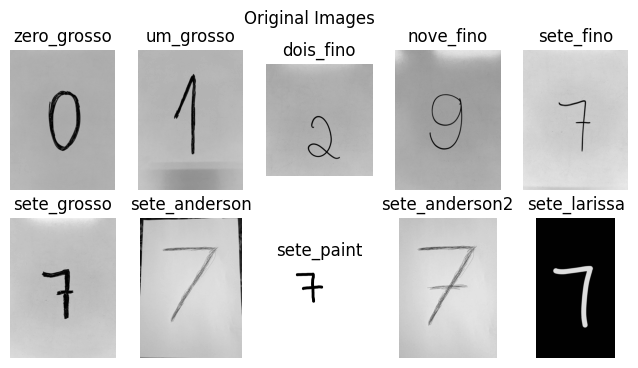

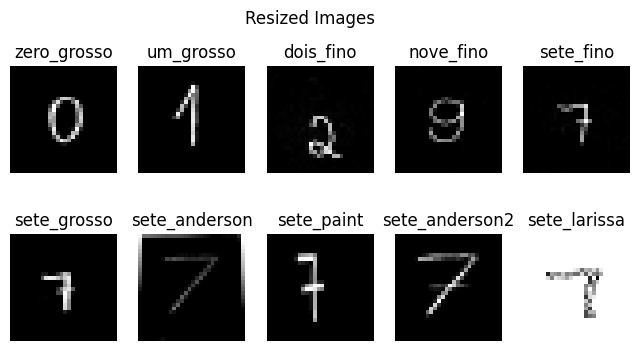

In [6]:
import cv2
import matplotlib.pyplot as plt

# Função para carregar e processar as imagens
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    copy = image.copy()
    _, resized_image = to_mnist(copy)  # Presumindo que to_mnist é sua função de pré-processamento
    return image, resized_image

# Lista de caminhos para as imagens
image_paths = {
    "zero_grosso": r"imagens/zero_grosso.jpeg",
    "um_grosso": r"imagens/um_grosso.jpeg",
    "dois_fino": r"imagens/dois_fino.jpeg",
    "nove_fino": r"imagens/nove_fino.jpeg",
    "sete_fino": r"imagens/sete_fino.jpeg",
    "sete_grosso": r"imagens/sete_grosso.jpeg",
    "sete_anderson": r"imagens/sete_anderson.jpeg",
    "sete_paint": r"imagens/sete_paint.png",
    "sete_anderson2": r"imagens/sete_anderson2.jpeg",
    "sete_larissa": r"imagens/sete_larissa.jpeg",
}

# Carregar e pré-processar as imagens usando dicionários para facilitar o acesso
original_images = {}
resized_images = {}

for name, path in image_paths.items():
    original, resized = load_and_preprocess_image(path)
    original_images[name] = original
    resized_images[name] = resized

# Exibir as imagens originais
plt.figure(figsize=(8, 4))
plt.suptitle("Original Images")
for i, (name, img) in enumerate(original_images.items()):
    plt.subplot(2, 5, i + 1)  # Ajustar para até 9 imagens
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(name)  # Adicionar título com o nome da imagem
    plt.axis("off")
plt.show()

# Exibir as imagens redimensionadas
plt.figure(figsize=(8, 4))
plt.suptitle("Resized Images")
for i, (name, img) in enumerate(resized_images.items()):
    plt.subplot(2, 5, i + 1)  # Ajustar para até 9 imagens
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(name)  # Adicionar título com o nome da imagem
    plt.axis("off")

Abre o modelo treinado `mnist_model.keras` e carrega as imagens para serem classificadas.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/home/samuel/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


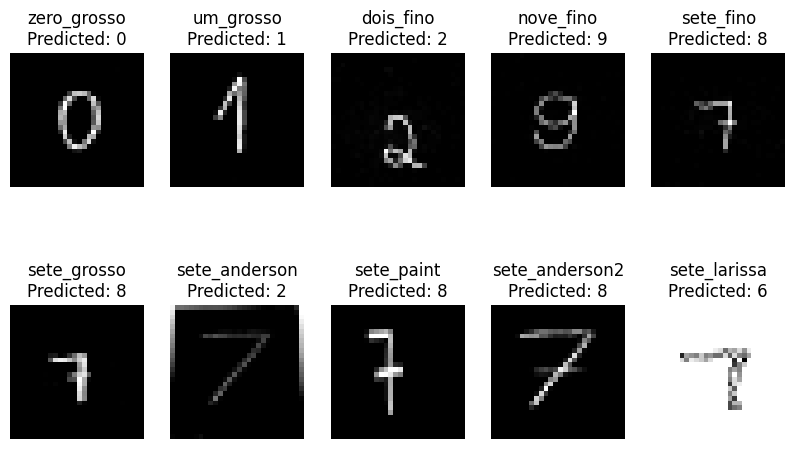

In [7]:
# Abrir o modelo salvo
model = keras.models.load_model('mnist_model.keras')
# model = keras.models.load_model("mnist_model_30epochs.keras")

# Fazer previsões nas imagens redimensionadas
plt.figure(figsize=(10, 6))
for i, (name, test_image) in enumerate(resized_images.items()):
    predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

    plt.subplot(2,5, i + 1)  # Grid 3x3 para 9 imagens
    plt.imshow(test_image.squeeze(), cmap="gray")
    plt.title(f"{name}\nPredicted: {predicted_label}")  # Mostra o nome da imagem junto com a previsão
    plt.axis("off")

plt.show()
